# My neural net doesn't work well, let's debug

Get data:

1. http://exoplanet.eu/catalog/csv/ - save as exoplanet.eu_catalog.csv
2. sudo apt install csvtool
3. csvtool col 1 exoplanet.eu_catalog.csv | tail -n +2 > exoplanet.eu_names.txt
           ^ take only name                 ^ remove heading

In [1]:
# Run only once
# import csv
# import string

# with (
#     open('data/exoplanet.eu_catalog.csv', 'r') as f_in,
#     open('data/exoplanet.eu_names.txt', 'w') as f_out 
# ):
#     reader = csv.reader(f_in)
#     # skip header 
#     next(reader, None)

#     for row in reader:
#         s = row[0]
#         s = ''.join(ch for ch in s if ch in string.printable)
#         # Remove alternative names 
#         # e.g. 1I/'Oumuamua or MASCARA-2 b/KELT-20 b 
#         s = s.split('/')[0];
        
#         # Make lowercase to make the program simpler 
#         s = s.lower()
#         s = s.replace(':', '-') # only "kmt-2018:blg-1996l b"
#         s = s.replace('\'', '.') # only: "teegarden's b" and "teegarden's c"
#         s = s.replace('v* v', 'v ') # only: "v* v2384 ori a" and "v* v2384 ori b"
#         s = s.replace('.', '-') # Removing the dot only because the video uses '.' to denote start/end of word
#         f_out.write(s +'\n')

In [2]:
words = open('data/exoplanet.eu_names.txt', 'r').read().splitlines()

# Some data about the data: 
print(f"Number of inputs: {len(words)}")
shortest = min(words, key = len)
print(f"Shortest, with {len(shortest)} characters: {shortest} ")
longest = max(words, key = len)
print(f"Longest, with {len(longest)} characters: {longest}")

# BTW. The 10th item is the data set is 1I othewise known as [1I/ʻOumuamua](https://en.wikipedia.org/wiki/%CA%BBOumuamua) 
# which is the 1st interstellar object detected passing through the Solar System! 
# That's why it's called 1I - one interstellar. 
#
# For added excitment check out the book by a Harvard University astronomer Avi Loeb 
# entitled [Extraterrestrial: The First Sign of Intelligent Life Beyond Earth](https://en.wikipedia.org/wiki/Extraterrestrial:_The_First_Sign_of_Intelligent_Life_Beyond_Earth).


# First ten elements 
print(words[:10])

chars = sorted(list(set(''.join(words))))

print(f"Chars (len: {len(chars)}): ")
print(','.join(chars))

Number of inputs: 5197
Shortest, with 2 characters: 1i 
Longest, with 31 characters: gaia edr3 2077240046296834304 b
['11 com b', '11 oph b', '11 umi b', '14 and b', '14 her b', '14 her c', '16 cyg b b', '17 sco b', '18 del b', '1i']
Chars (len: 43): 
 ,(,),+,-,0,1,2,3,4,5,6,7,8,9,[,],a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z


In [3]:
n_input = len(chars) + 1 # 1 for start/end

stoi = {}
stoi['.'] = 0
for i,s in enumerate(chars):
    stoi[s] = i + 1
itos = {i: s for s, i in stoi.items()}

In [4]:
import torch

In [5]:
# by default dtype is torch.float32 
model_statistical = torch.zeros(n_input,n_input, dtype=torch.int32)  

for w in words: 
    w = '.' + w + '.' 
    for ch1, ch2 in zip(w, w[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        model_statistical[ix1, ix2] += 1

(-0.5, 43.5, 43.5, -0.5)

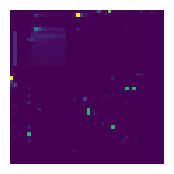

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(2,2))
plt.imshow(model_statistical) 
plt.axis('off')

In [9]:
# Let's get a model with uniform distribution (aka any bigram is as likely)

model_uniform = torch.ones((n_input,n_input)) # If all counts are 1 then all 'next-letter' are equally likely


(-0.5, 43.5, 43.5, -0.5)

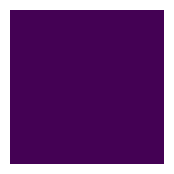

In [10]:
plt.figure(figsize=(2,2))
plt.imshow(model_uniform) 
plt.axis('off')

In [11]:
def showSamples(model, n):
    g = torch.Generator().manual_seed(7)

    for i in range(20):
        ix = 0;
        name = []; 
        while True:
            Ni = model[ix].float()
            ix = Ni.multinomial(num_samples=1, replacement= True, generator= g).item()
            if ix == 0:
                break;
            name.append(itos[ix])

        print(''.join(name))

In [12]:
# Let's get 20 names
showSamples(model = model_uniform, n = 20)

66tkws6gpp((1 -t
x+zwul7voxs0yf)kn9(2(o9av9d31r9gr
[3wmwxstorirfjf5cf89e637y8ga5xnpz
t[q14[75[][pw9-s6lxe6ufjmelunlsbwy7w82
)yt0)l8d
g5z5jtbr8phelsh70djsiij cprl0m3wyd0x3o(08]+u5e l7g+5 wcexunervmd[cs
6]y)y
6awljjp1nqgm))jn33oybmz8lf956j-vicoe cfv771n5]g43b344ozoag607kvvwz7zo88u(2xtaikxgi3i0 6[y+xup7yg[shz5o 8
sln5d19n))92x-)045rpx ]h
h[34ra -tn7mjtvmmogt+9-[7i9
htfm)bm5n0
08igp)[p9upm9q
-
tqwxv[0t26gdrn[gdc7e3yytvw9oz8txln
bn4a37661l7ov

bz)6o75m7ts+yqd]q9u8h-npa)fx5u[jfs2n7[r7ru9odd19knt6n7sf5f-[khc9f9znbn5zofudgafxc)[ sgcoxa6aydvbrnzr1+2i6jiyq+1cokp(bsyw
m5(rlp67x 38s68x8mqkq rfxdavs- (en0t]g1fjx0jf9fovez [thzno)4y)sbs8ogwqm1r-)q+(2p2frd2gi2aa qq(lq5y4afsaf 6h6aq4p(am83m
m65]5)kw
q-fw0qym4ds+sxi1g]a4 v-gif[6[yoerezb6s5b9avf3kp x0bv8w7cist+46oi6smuchiv6t n [gpz463gw-c]21b-txzu(-nchi8wu-x(i7ked3j-v(uigitgb08ov44sq278vi3wk]3d


In [14]:
# Let's get 20 names
showSamples(model = model_statistical, n = 20)

ker-97 b
k2 8 37 epssspler-7 ep-360 a b
keplepler-0108489775647233-211211009 b
hic
x c
keplepleplg-17 bd b
ker-47557189 d a
hipler-2 b
wasr-7-6335730 b
ker-13674 b
ttogplelepler-2 b
k2-181398526852017
ker-b
ker-346 b
kep-35 b
waswasplepler-252 b
r-105 b
hd b
hdhd b
hd cerogtoi-8 b) b


# Building the neural network model